<a href="https://colab.research.google.com/github/a90h09/T5-Week1-Task/blob/main/Task_(2)_Week_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Objective
* The objective of this exercise is to explore and visualize the Traffic Index dataset to gain insights and understand the patterns in the data.

##Dataset Description

| Column Name | Description | Data Type |
| :---------------- | :------: | ----: |
|   City  |   Name of the city	   | Object |
| Datetime           |   Date and time of the data entry	   | Object |
|  TrafficIndexLive    |  Real-time traffic index	   | Int |
|  Jamscount |  Number of traffic jams	   | Int |
|   JamsDelay  |   Total delay caused by traffic jams (in minutes)	   | Float |
|JamsLength           |   Total length of traffic jams (in kilometers)	   | Float |
|  TrafficIndexWeekAgo    |  Traffic index one week ago	   | Int |
|  TravelTimeHistoric |  Historical average travel time (in minutes)	   | Float |
|   TravelTimeLive  |   Real-time travel time (in minutes)	   | Float |


*   Name : Ahmed Abdullah Bashmmakh
*   Group : 10







# Tasks

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/Task (2) Dataset.csv')

In [3]:
df.head()

,City,Datetime,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive
0,Abudhabi,2023-07-07 08:01:30,6,4,15.6,0.7,13,59.611918,54.803617
1,Abudhabi,2023-07-07 09:01:30,7,7,20.5,1.7,8,60.221387,56.118629
2,Abudhabi,2023-07-07 10:46:30,7,8,25.0,2.8,6,59.161978,55.518834
3,Abudhabi,2023-07-07 11:16:30,8,11,30.6,5.5,6,59.738138,56.413917
4,Abudhabi,2023-07-07 12:01:30,8,20,62.1,6.5,5,58.958314,56.059246


## 1. Exploratory Data Analysis (EDA)

### Perform summary statistics on the dataset.

In [4]:
df.describe()

,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive
count,66639.000000,66639.000000,66639.000000,66639.000000,66639.000000,62772.000000,62772.000000
mean,14.043113,74.278531,288.353877,49.316135,13.981737,70.706601,70.048451
std,13.488906,107.452022,470.013224,85.352525,13.454922,10.588384,11.966725
min,0.000000,0.000000,0.000000,0.000000,0.000000,49.381346,46.723235
25%,3.000000,9.000000,27.700000,3.000000,3.000000,63.142591,60.712805
50%,10.000000,29.000000,95.700000,12.200000,10.000000,68.894790,68.247303
75%,21.000000,95.000000,336.600000,53.500000,21.000000,76.250975,77.043739
max,138.000000,1359.000000,9989.400000,1173.900000,138.000000,120.140593,134.484139


In [5]:
# Convert 'Datetime' column to datetime type
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Extract additional time-related features
df['Year'] = df['Datetime'].dt.year
df['Month'] = df['Datetime'].dt.month
df['Day'] = df['Datetime'].dt.day
df['Hour'] = df['Datetime'].dt.hour

In [6]:
# 'Month' column contains numerical representation of months (1 for January, 2 for February, etc.)
def get_season(month):
  """
  This function takes a month number (1-12) and returns the seasons.
  """
  if month in [12, 1, 2]:
    return 'Winter'
  elif month in [3, 4, 5]:
    return 'Spring'
  elif month in [6, 7, 8]:
    return 'Summer'
  elif month in [9, 10, 11]:
    return 'Autumn'
  else:
    return 'Unknown'
# Apply the get_season function to the 'Month' column to create a new 'Season' column
df['Season'] = df['Month'].apply(get_season)

### Identify and analyze patterns in the data.

Text(0, 0.5, 'Frequency')

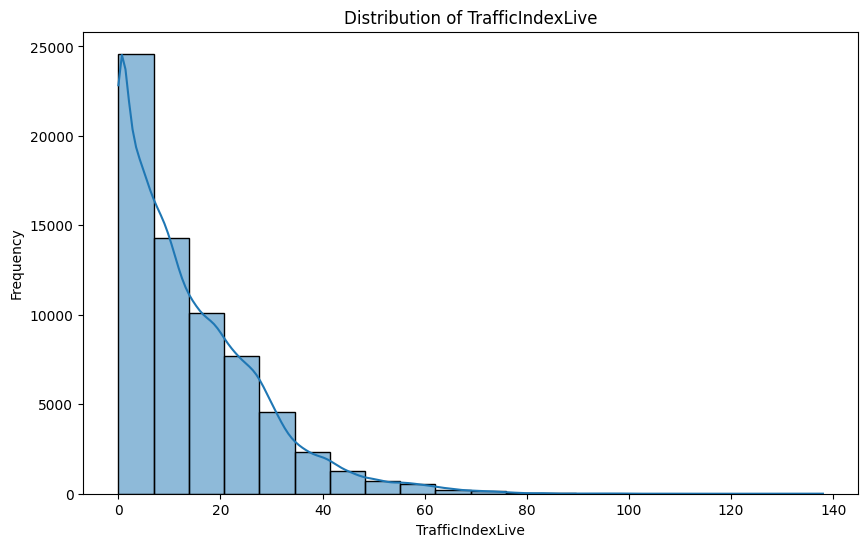

In [7]:
# Explore the distribution of TrafficIndexLive
plt.figure(figsize=(10, 6))
sns.histplot(df['TrafficIndexLive'], kde=True,bins=20)
plt.title('Distribution of TrafficIndexLive')
plt.xlabel('TrafficIndexLive')
plt.ylabel('Frequency')

### Visualize the distribution of key variables (e.g., Traffic_Index, Date).

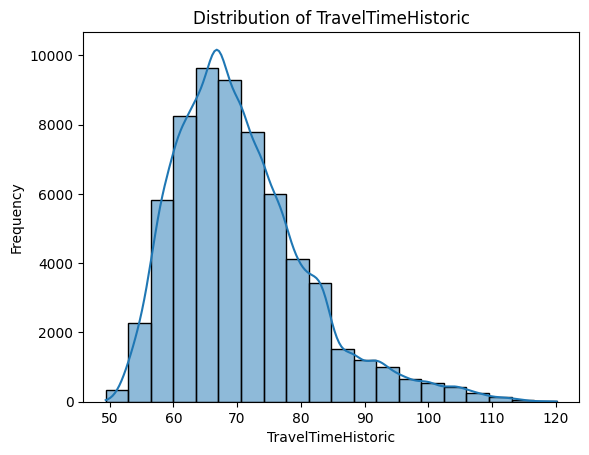

In [8]:
# Create a hist plot for finding the distribution
sns.histplot(df['TravelTimeHistoric'], kde=True,bins=20)
plt.title('Distribution of TravelTimeHistoric')
plt.xlabel('TravelTimeHistoric')
plt.ylabel('Frequency')
plt.show()

### Explore relationships between variables (e.g., Traffic_Index vs. Weather_Condition).



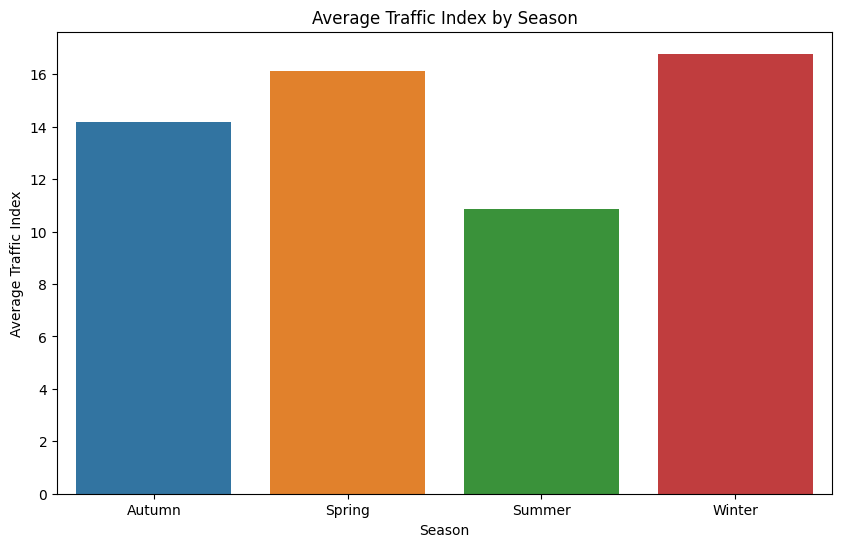

In [25]:
# Group the data by season and calculate the average TrafficIndexLive for each season
seasonal_traffic = df.groupby('Season')['TrafficIndexLive'].mean().reset_index()
# Create a bar plot to visualize the average TrafficIndexLive for each season
plt.figure(figsize=(10, 6))
sns.barplot(x='Season', y='TrafficIndexLive', data=seasonal_traffic,hue='Season',errorbar=None)
plt.title('Average Traffic Index by Season')
plt.xlabel('Season')
plt.ylabel('Average Traffic Index')
plt.show()


## 2. Data Visualization

* Ensure the visualizations are clear and informative.

### Create visualizations to illustrate the findings from the EDA.


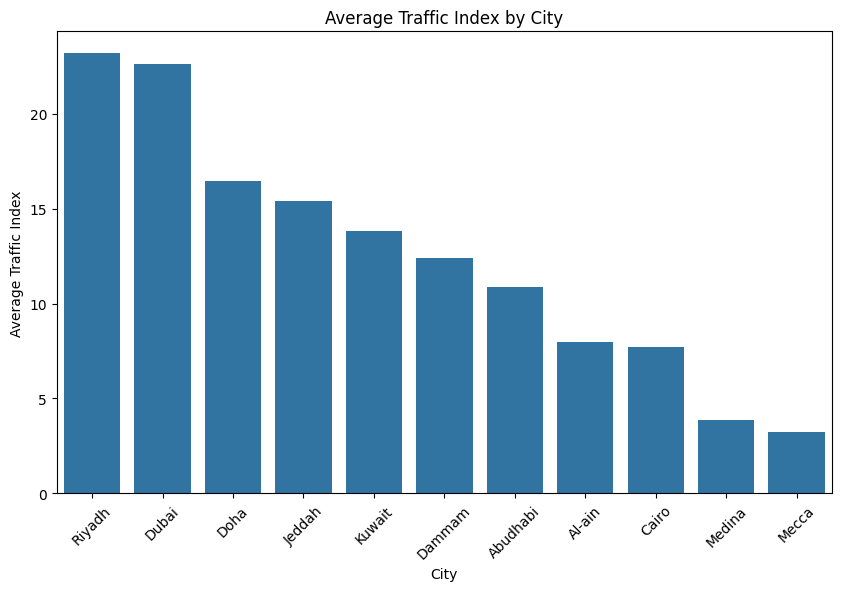

In [53]:
# Group the data by city and calculate the average traffic index
city_traffic = df.groupby('City')['TrafficIndexLive'].mean().sort_values(ascending=False)

# Create a bar plot to visualize the average traffic index by city
plt.figure(figsize=(10, 6))
sns.barplot(x=city_traffic.index, y=city_traffic.values)
plt.title('Average Traffic Index by City')
plt.xlabel('City')
plt.ylabel('Average Traffic Index')
plt.xticks(rotation=45)
plt.show()

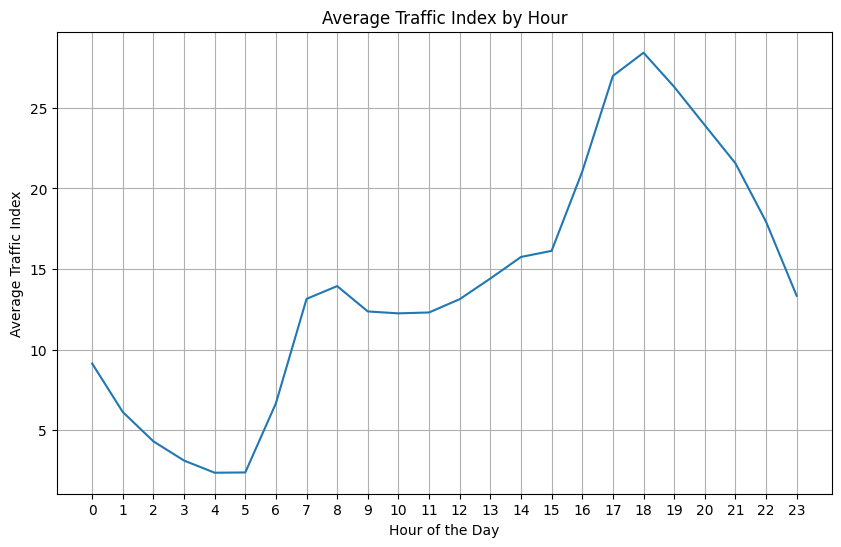

In [42]:
# Group the data by hour and calculate the average TrafficIndexLive for each hour
hourly_traffic = df.groupby('Hour')['TrafficIndexLive'].mean().reset_index()

# Create a line plot to visualize the average TrafficIndexLive for each hour
plt.figure(figsize=(10, 6))
sns.lineplot(x='Hour', y='TrafficIndexLive', data=hourly_traffic)
plt.title('Average Traffic Index by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Traffic Index')
plt.xticks(range(24))
plt.grid(True)
plt.show()

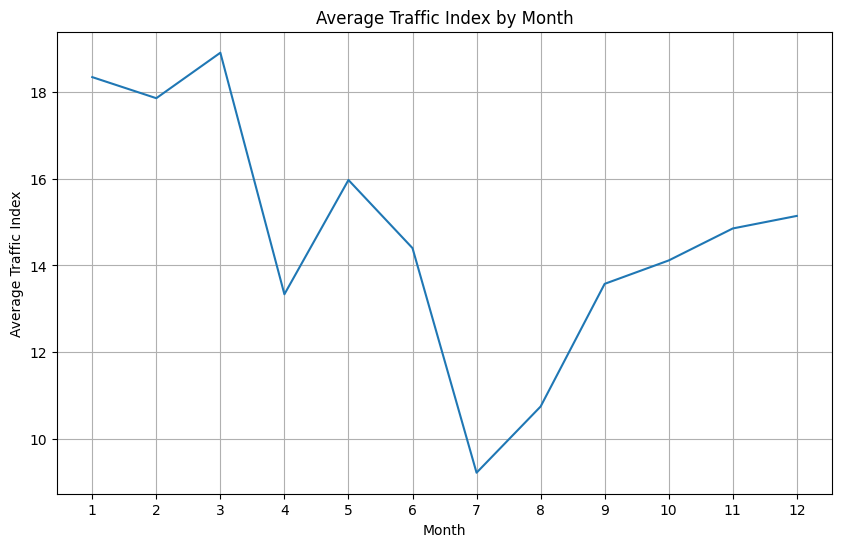

In [45]:
monthly_traffic = df.groupby('Month')['TrafficIndexLive'].mean().reset_index()

# Create a line plot to visualize the average TrafficIndexLive for each month
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='TrafficIndexLive', data=monthly_traffic)
plt.title('Average Traffic Index by Month')
plt.xlabel('Month')
plt.ylabel('Average Traffic Index')
plt.xticks(range(1,13))
plt.grid(True)
plt.show()


### Use appropriate plots such as histograms, bar charts, pie charts, scatter plots, and heatmaps.

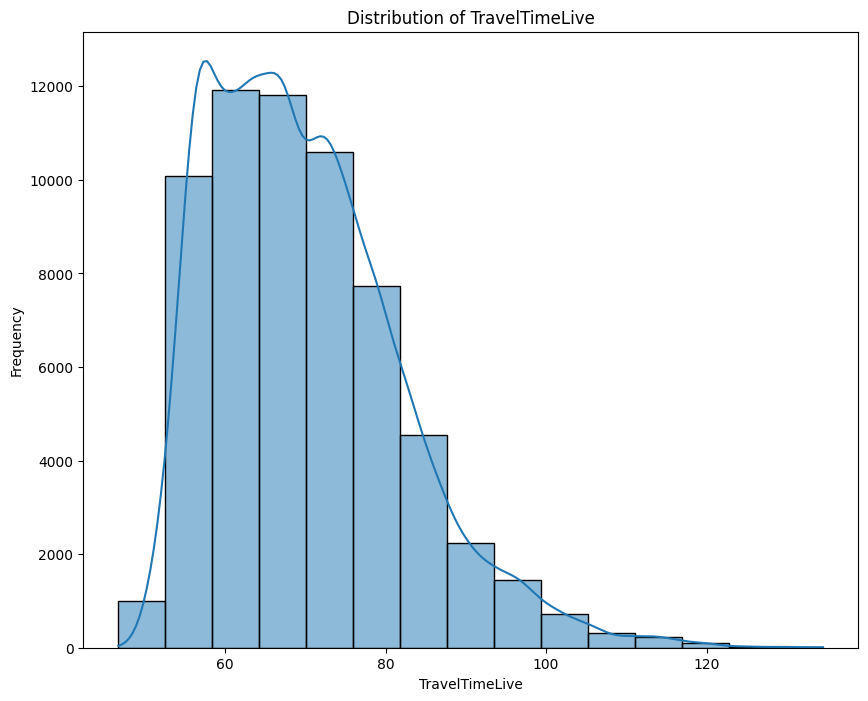

In [31]:
# Create a Hist plot for 'TravelTimeLive' column
plt.figure(figsize=(10, 8))
sns.histplot(df['TravelTimeLive'], kde=True,bins=15)
plt.title('Distribution of TravelTimeLive')
plt.xlabel('TravelTimeLive')
plt.ylabel('Frequency')
plt.show()

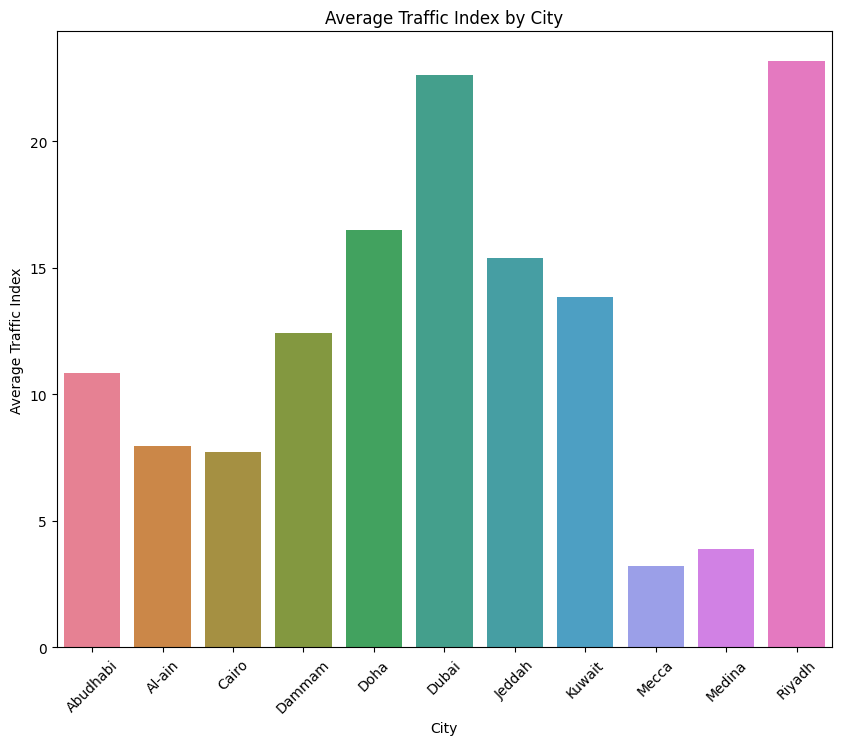

In [26]:
# Create a Bar plot for 'City' and 'TrafficIndexLive'
plt.figure(figsize=(10, 8))
sns.barplot(data=df, x='City', y='TrafficIndexLive',hue='City',errorbar=None)
plt.title('Average Traffic Index by City')
plt.xlabel('City')
plt.ylabel('Average Traffic Index')
plt.xticks(rotation=45)
plt.show()

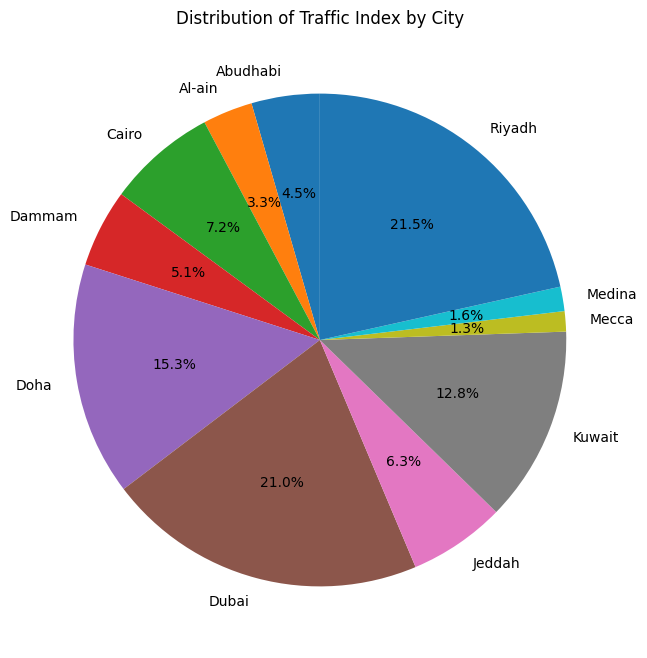

In [27]:
city_traffic = df.groupby('City')['TrafficIndexLive'].sum()
# Create a pie chart for 'City' and 'TrafficIndexLive'
plt.figure(figsize=(10, 8))
plt.pie(city_traffic, labels=city_traffic.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Traffic Index by City')
plt.show()


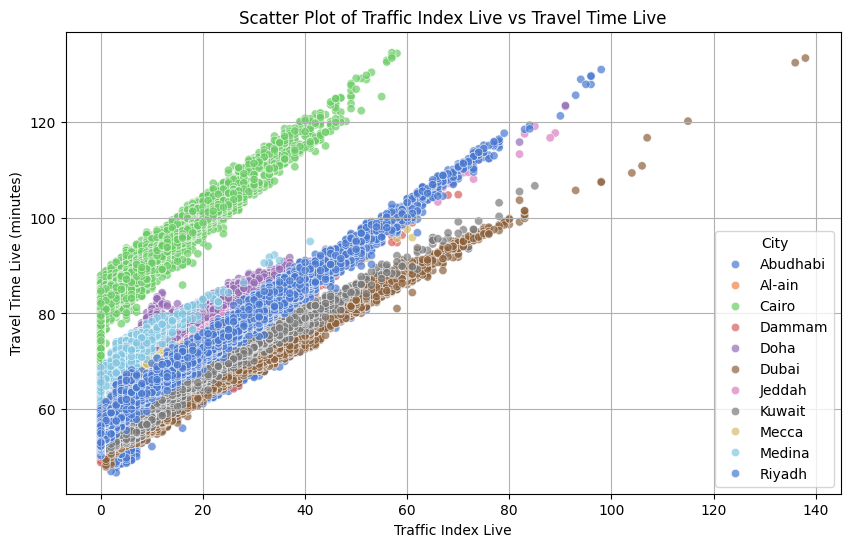

In [52]:
# Scatter plot to visualize the relationship between TrafficIndexLive and TravelTimeLive
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='TrafficIndexLive', y='TravelTimeLive', hue='City', palette='muted', alpha=0.7)
plt.title('Scatter Plot of Traffic Index Live vs Travel Time Live')
plt.xlabel('Traffic Index Live')
plt.ylabel('Travel Time Live (minutes)')
plt.legend(title='City', loc='lower right')
plt.grid(True)
plt.show()

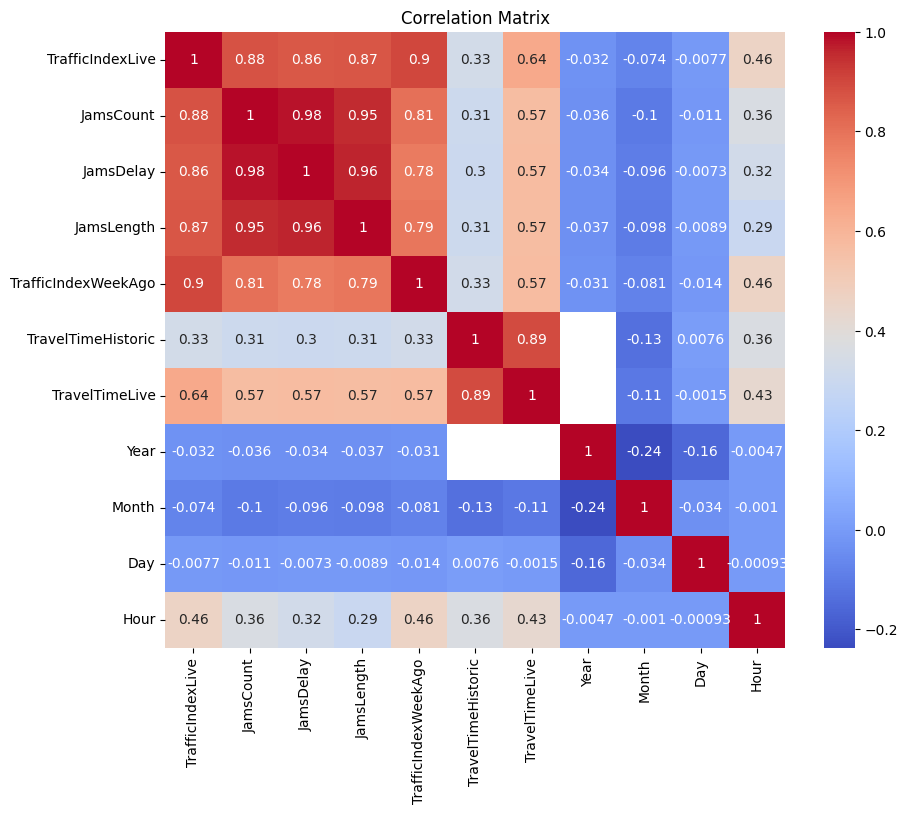

In [30]:
# Analyze the correlation between variables
# Select only numerical columns
numerical_df=df.select_dtypes(include=[np.number])
correlation_matrix = numerical_df.corr()
# Create a Heat map for Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## 3. Insights and Conclusions

* <h3>Summarize the key insights gained from the data analysis.<h3/>
* <h3>Draw conclusions based on the patterns observed in the data.<h3/>

In [12]:
# Key Insights:

# - Traffic patterns exhibit strong seasonality, with certain seasons experiencing higher congestion, with summer the lowest and winter the highest.
# - Time of day significantly influences traffic flow, with peak hours showing increased congestion.
# - A positive correlation exists between the number of traffic jams and the total delay caused by them.
# - Weekday traffic patterns may differ from weekend patterns.
# - Weather conditions could potentially impact traffic congestion (although not directly explored in this analysis).

# Conclusions:

# Seasonal adjustments: Traffic management plans should consider seasonal variations.
# Peak hour management: Strategies to address peak hour congestion could include flexible work hours.
# Jam reduction:  Efforts to minimize the occurrence and impact of traffic jams, such as incident response teams and real-time traffic information.
